In [16]:
import pandas as pd

def import_Users_AllData(csv_filename):
    FullDataframe = pd.read_csv(csv_filename)
    print("shape = ", FullDataframe.shape)
    print("column names = ", list(FullDataframe.columns))
    print("\n")
    return FullDataframe
    #print(FullDataframe.head())
    
def remove_users(AllData_dataframe, remove_filename):
    UsersToRemove = pd.read_csv(remove_filename)
    AllUsers = AllData_dataframe['username']
    print("Before removing, shape of dataframe = ", AllData_dataframe.shape)
    UsersToBeRemoved = list(UsersToRemove['username'])
    
    ### Now removing
    i = 0
    for eachuser in AllUsers:
        if eachuser in UsersToBeRemoved:
            AllData_dataframe = AllData_dataframe.drop(i)
        i+=1
        
    print("After removing, shape of dataframe = ", AllData_dataframe.shape)
    #print(AllData_dataframe.head())
    
    return AllData_dataframe
    

In [17]:
### First need to remove users using removeUsers_DidMentionBackUsers.csv.
### Then during second point and third point hypothesis analysis, remove users who do not have any second point or
### third point of contact using the remove_from_second_point_mentionedback.csv files.

In [18]:
FullDataframe = import_Users_AllData('6_months_cutoff/noninf_responsive_05_18_20_6month.csv')
FullDataframe = remove_users(FullDataframe, '6_months_cutoff/users_to_remove_6month_noninf_responsive_05_18_20.csv')
### Since we deleted some rows from FullDataFrame in the beginning, we need to reindex before trying to delete
### again.
FullDataframe = FullDataframe.reset_index(drop=True)

#FullDataframe = remove_users(FullDataframe, '6_months_cutoff/noninf_responsive_05_18_20_6month.csv')

shape =  (623, 50)
column names =  ['Unnamed: 0', 'username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3', 'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3', 'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3', 'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3', 'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3', 'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3', 'before_sentiment1', 'before_sentiment2', 'before_sentiment3', 'after_sentiment1', 'after_sentiment2', 'after_sentiment3', 'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3', 'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3', 'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3', 'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3', 'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3', 'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',

In [19]:
### Files created for users to be deleted who do not have a second contact point and a third contact point using
### the column which has a Nan value for users who do not have any second or third point of contact.

### Turns out that out of the 525 users we get after removing the users who did not have data at least 3 months 
### data prior to their first point of contact, all of them had a second point of contact too, but not all had a 
### third point of contact.

### Now do the hypothesis testing for before-after analysis using Wilcoxon testing

In [20]:
## We have 577 users. We need two lists, 1st list will be a count of all tweets of a user 12 months prior to the 
## first point of contact and the 2nd list will be the total count of tweets of the same users 12 months after the
## point of contact. So each list size will be 577.
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

def StatisticalTesting_FirstContact(FullDataframe, column_name):
    beforeFirstContact_Value = []
    afterFirstContact_Value = []
    AllUsersCounts_before1 = list(FullDataframe['before_'+column_name+'1'])
    
    AllUsersCounts_after1 = list(FullDataframe['after_'+column_name+'1'])
    
    

    for eachuser_value in AllUsersCounts_before1:
        beforeFirstContact_Value.append(eachuser_value)
        
    for eachuser_value in AllUsersCounts_after1:
        afterFirstContact_Value.append(eachuser_value)
        

        
    count_for_plotting = beforeFirstContact_Value + afterFirstContact_Value
    print("length of count_for_plotting = ", len(count_for_plotting))
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(20,6))  
    plt.plot(count_for_plotting, 'co-', markersize=3)
    plt.axvline(len(count_for_plotting)//2)
    plt.show()
    
    stat, p = wilcoxon(beforeFirstContact_Value, afterFirstContact_Value)
    print("p = ", p)
    #print("stat = ", stat)
    if p < 0.01:
        print("Change is statistically significant at significance level of 1%.")
    else:
        if p < 0.05:
            print("Change is statistically significant at significance level of 5%.")
        else:
            print("Change is NOT statistically significant even at significance level of 5%.")
    

def StatisticalTesting_SecondContact(FullDataframe, column_name):
    beforeFirstContact_Value = []
    afterFirstContact_Value = []
    AllUsersCounts_before2 = list(FullDataframe['before_'+column_name+'2'])
    AllUsersCounts_after2 = list(FullDataframe['after_'+column_name+'2'])
    

    for eachuser_value in AllUsersCounts_before2:
        #if eachuser_value!=0:
        beforeFirstContact_Value.append(eachuser_value)
        
    for eachuser_value in AllUsersCounts_after2:
        #if eachuser_value!=0:
        afterFirstContact_Value.append(eachuser_value)
        
    print(len(beforeFirstContact_Value), len(afterFirstContact_Value))
        
    count_for_plotting = beforeFirstContact_Value + afterFirstContact_Value
    print("length of count_for_plotting = ", len(count_for_plotting))
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(20,6))  
    plt.plot(count_for_plotting, 'co-', markersize=3)
    plt.axvline(len(count_for_plotting)//2)
    plt.show()
    
    stat, p = wilcoxon(beforeFirstContact_Value, afterFirstContact_Value)
    print("p = ", p)
    #print("stat = ", stat)
    if p < 0.01:
        print("Change is statistically significant at significance level of 1%.")
    else:
        if p < 0.05:
            print("Change is statistically significant at significance level of 5%.")
        else:
            print("Change is NOT statistically significant even at significance level of 5%.")
    
def StatisticalTesting_ThirdContact(FullDataframe, column_name):
    beforeFirstContact_Value = []
    afterFirstContact_Value = []
    AllUsersCounts_before3 = list(FullDataframe['before_'+column_name+'3'])
    AllUsersCounts_after3 = list(FullDataframe['after_'+column_name+'3'])
    

    for eachuser_value in AllUsersCounts_before3:
        #if eachuser_value!=0:
        beforeFirstContact_Value.append(eachuser_value)
        
    for eachuser_value in AllUsersCounts_after3:
        #if eachuser_value!=0:
        afterFirstContact_Value.append(eachuser_value)
        
    print(len(beforeFirstContact_Value), len(afterFirstContact_Value))
        
    count_for_plotting = beforeFirstContact_Value + afterFirstContact_Value
    print("length of count_for_plotting = ", len(count_for_plotting))
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(20,6))  
    plt.plot(count_for_plotting, 'co-', markersize=3)
    plt.axvline(len(count_for_plotting)//2)
    plt.show()
    
    stat, p = wilcoxon(beforeFirstContact_Value, afterFirstContact_Value)
    print("p = ", p)
    #print("stat = ", stat)
    if p < 0.01:
        print("Change is statistically significant at significance level of 1%.")
    else:
        if p < 0.05:
            print("Change is statistically significant at significance level of 5%.")
        else:
            print("Change is NOT statistically significant even at significance level of 5%.")
    

    


### Mentioned back - First point of Contact

length of count_for_plotting =  1050


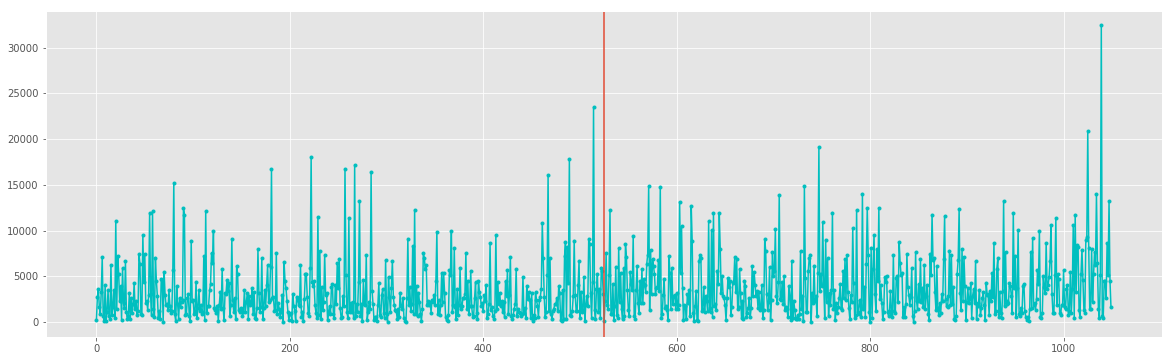

p =  4.155033117541025e-15
Change is statistically significant at significance level of 1%.


In [21]:
StatisticalTesting_FirstContact(FullDataframe, 'tweetcount')

length of count_for_plotting =  1050


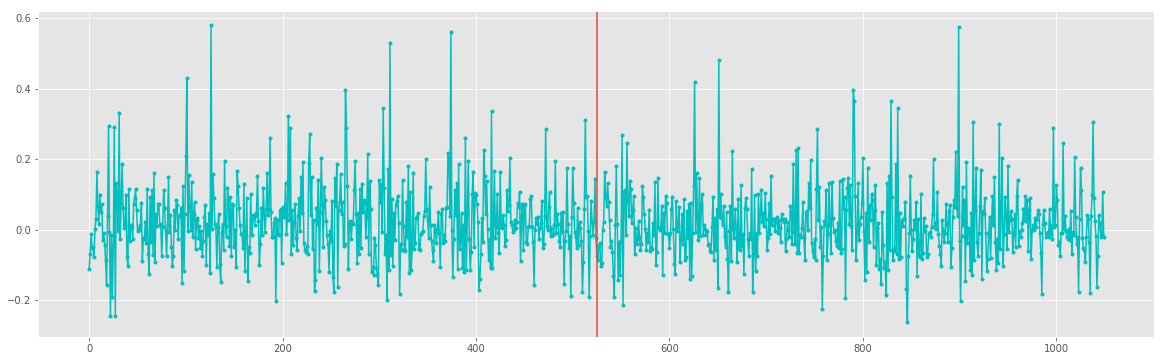

p =  3.431445939227965e-05
Change is statistically significant at significance level of 1%.


In [22]:
StatisticalTesting_FirstContact(FullDataframe, 'sentiment')

length of count_for_plotting =  1050


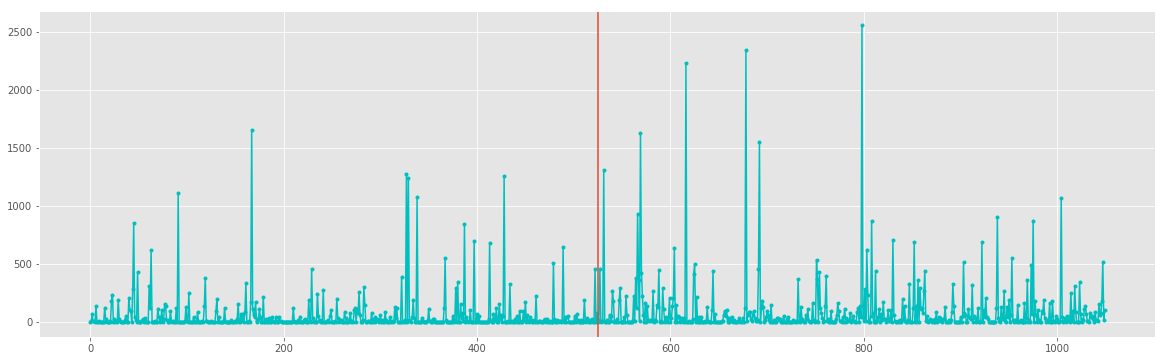

p =  2.2187262295547374e-18
Change is statistically significant at significance level of 1%.


In [23]:
StatisticalTesting_FirstContact(FullDataframe,'trumpcount')

length of count_for_plotting =  1050


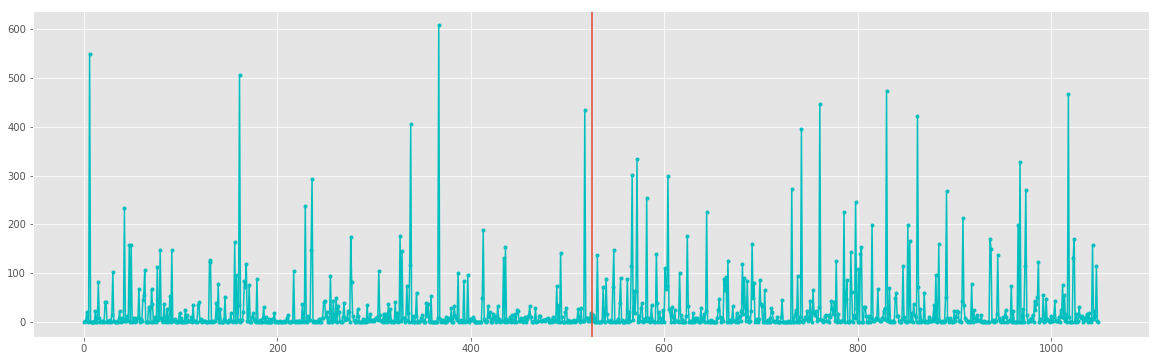

p =  2.3434424987422283e-09
Change is statistically significant at significance level of 1%.


In [24]:
StatisticalTesting_FirstContact(FullDataframe, 'clintoncount')

length of count_for_plotting =  1050


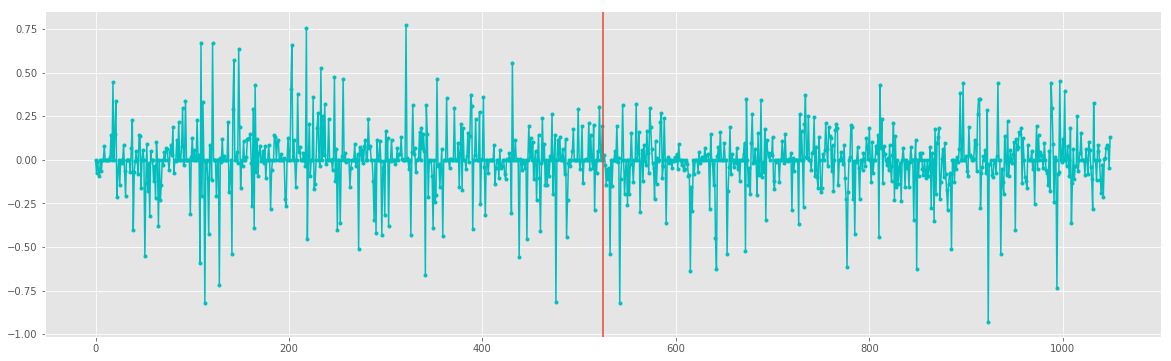

p =  0.04129944370974123
Change is statistically significant at significance level of 5%.


In [25]:
StatisticalTesting_FirstContact(FullDataframe, 'trump_sent')

length of count_for_plotting =  1050


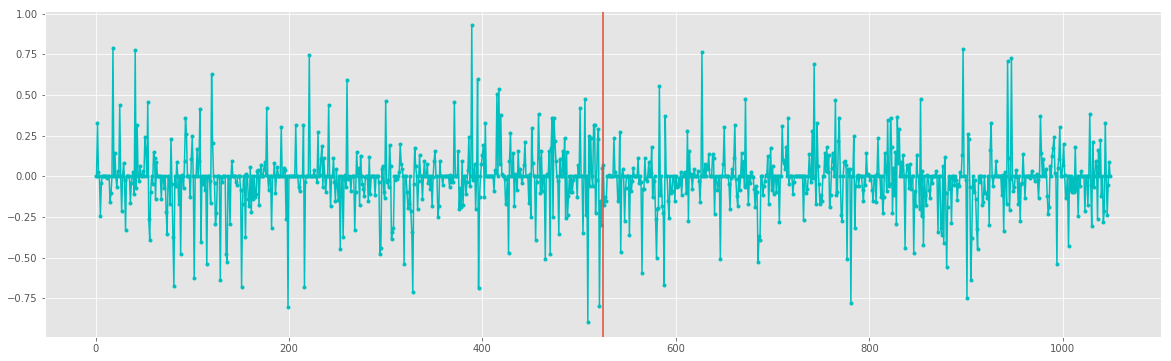

p =  0.21171378710266675
Change is NOT statistically significant even at significance level of 5%.


In [26]:
StatisticalTesting_FirstContact(FullDataframe, 'clinton_sent')

### Mentioned back - Second point of Contact 

In [37]:
### Since we deleted some rows from FullDataFrame in the beginning, we need to reindex before trying to delete
### again.
FullDataframe = FullDataframe.reset_index(drop=True)


In [39]:
FullDataframe

,Unnamed: 0,username,before_tweetcount1,before_tweetcount2,before_tweetcount3,after_tweetcount1,after_tweetcount2,after_tweetcount3,before_trumpcount1,before_trumpcount2,...,before_trump_sent3,after_trump_sent1,after_trump_sent2,after_trump_sent3,before_clinton_sent1,before_clinton_sent2,before_clinton_sent3,after_clinton_sent1,after_clinton_sent2,after_clinton_sent3
0,0,Gypsy7714,70,70,70,45,45,45,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,thejenn999,1577,579,0,1078,730,0,6,12,...,0.000000,0.175960,0.236200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,Romey999,2727,5900,5900,1732,1281,1281,70,334,...,-0.051553,0.020061,0.003569,0.003569,0.325200,-0.129244,-0.129244,0.000000,0.000000,0.000000
3,4,rathernotsay,1557,1557,6945,1852,1852,1667,9,9,...,-0.038675,-0.142650,-0.142650,-0.041559,0.025050,0.025050,0.134429,-0.153837,-0.153837,-0.500400
4,5,AbuSumayyah100,624,624,624,902,902,902,4,4,...,-0.149850,0.080100,0.080100,0.080100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,617,markfromalbany,3449,3449,3449,5975,5975,5975,0,0,...,0.000000,0.080530,0.080530,0.080530,0.292811,0.292811,0.292811,-0.005056,-0.005056,-0.005056
521,619,marnes,200,459,1338,1559,2172,1614,2,3,...,0.150171,0.192061,0.143919,-0.036314,-0.795900,-0.795900,-0.401900,0.000000,-0.195300,-0.159100
522,620,bsg1949,5256,8270,7749,7401,1761,1381,365,272,...,0.091355,0.078650,0.001487,0.034368,-0.457350,-0.072758,-0.043911,-0.076069,0.017878,0.005100
523,621,Chlanandria,1973,3218,3367,3241,3331,1445,0,30,...,-0.026923,0.088080,-0.013048,-0.047826,-0.299700,-0.396875,-0.068050,0.088967,-0.031275,-0.278700


In [40]:
UsersToRemove = pd.read_csv('remove_from_second_point_mentionedback.csv')
AllUsers = FullDataframe['username']
print("Before removing, shape of dataframe = ", FullDataframe.shape)
UsersToBeRemoved = list(UsersToRemove['Usernames_to_remove'])

### Now removing
i = 0
for eachuser in AllUsers:
    if eachuser in UsersToBeRemoved:
        FullDataframe = FullDataframe.drop(i)
    i+=1

print("After removing, shape of dataframe = ", FullDataframe.shape)
#print(AllData_dataframe.head())

Before removing, shape of dataframe =  (525, 38)
After removing, shape of dataframe =  (525, 38)


525 525
length of count_for_plotting =  1050


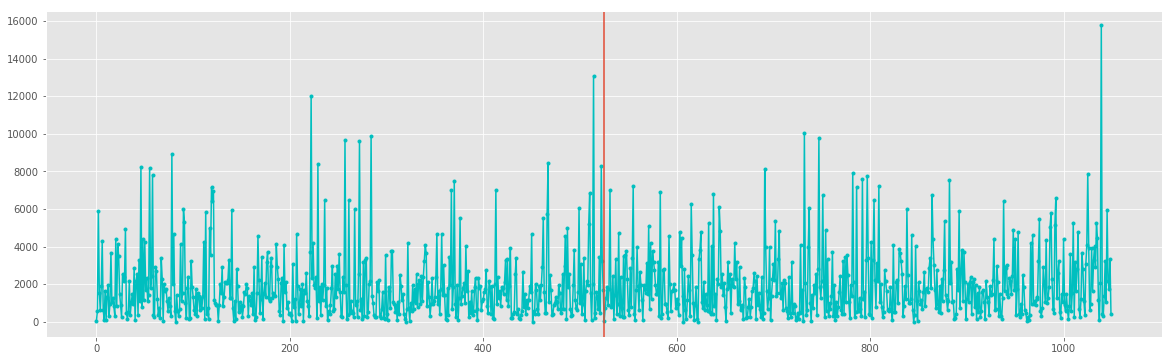

p =  0.0017131336151909274
Change is statistically significant at significance level of 1%.


In [41]:
StatisticalTesting_SecondContact(FullDataframe, 'tweetcount')

525 525
length of count_for_plotting =  1050


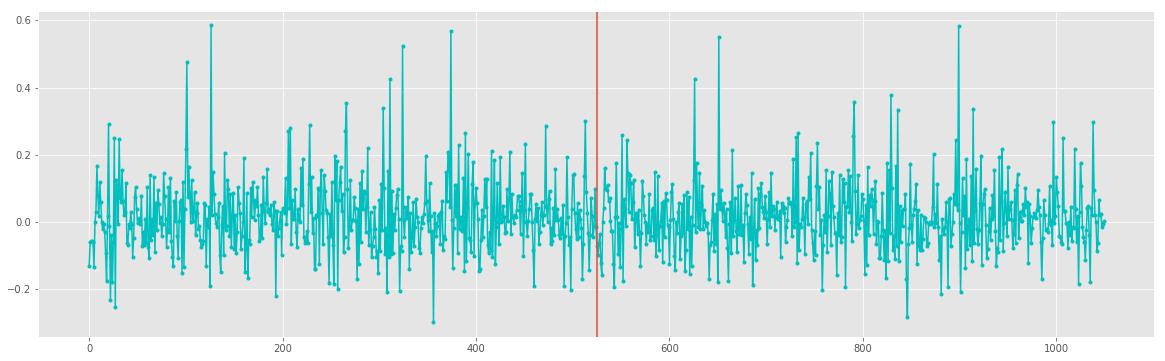

p =  0.19264292384371795
Change is NOT statistically significant even at significance level of 5%.


In [42]:
StatisticalTesting_SecondContact(FullDataframe, 'sentiment')

525 525
length of count_for_plotting =  1050


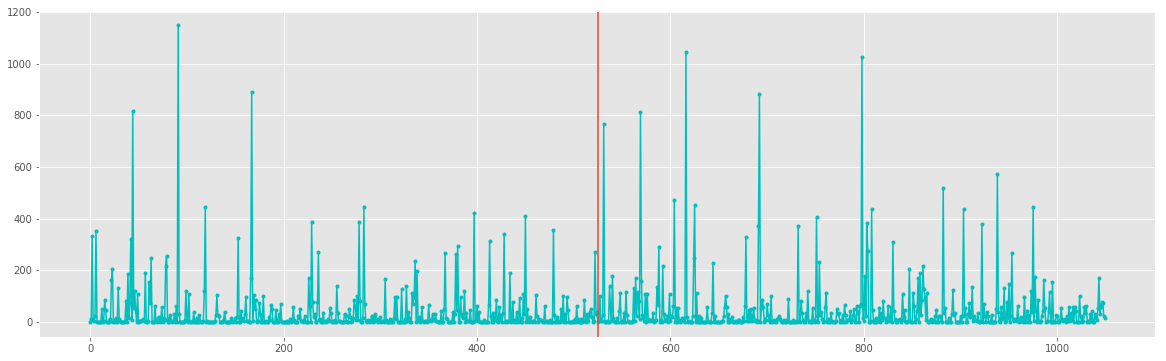

p =  0.0001274653971270092
Change is statistically significant at significance level of 1%.


In [43]:
StatisticalTesting_SecondContact(FullDataframe, 'trumpcount')

525 525
length of count_for_plotting =  1050


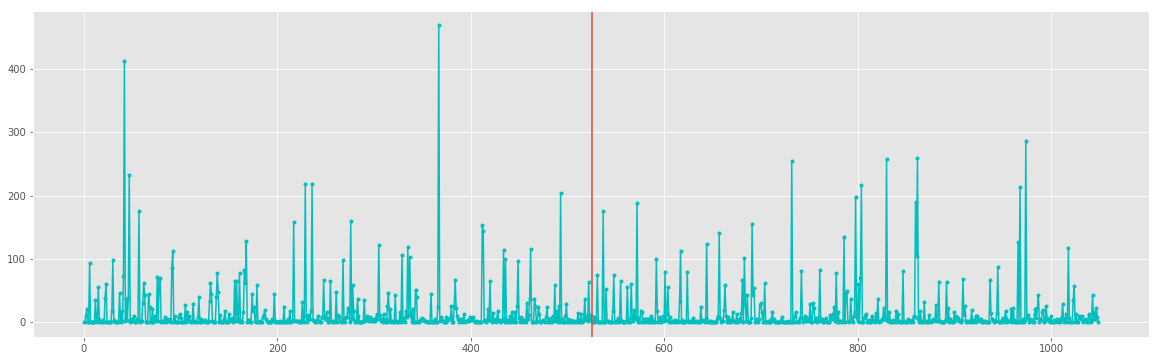

p =  0.032478414567005426
Change is statistically significant at significance level of 5%.


In [44]:
StatisticalTesting_SecondContact(FullDataframe, 'clintoncount')

### Now let's repeat the same before-after analysis for users who were contacted by IRAs but they did not mention back

In [27]:
FullDataframe = import_Users_AllData('6_months_cutoff/noninf_nonresponsive_05_18_20_6month.csv')
FullDataframe = remove_users(FullDataframe, '6_months_cutoff/users_to_remove_6month_noninf_non_responsive_05_18_20.csv')
### Since we deleted some rows from FullDataFrame in the beginning, we need to reindex before trying to delete
### again.
FullDataframe = FullDataframe.reset_index(drop=True)
#FullDataframe = remove_users(FullDataframe, '90_day_cutoff/users_to_remove_90_non_responsive.csv')

shape =  (1434, 50)
column names =  ['Unnamed: 0', 'username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3', 'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3', 'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3', 'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3', 'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3', 'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3', 'before_sentiment1', 'before_sentiment2', 'before_sentiment3', 'after_sentiment1', 'after_sentiment2', 'after_sentiment3', 'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3', 'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3', 'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3', 'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3', 'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3', 'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3'

### Did not mention back - First point of Contact

length of count_for_plotting =  2278


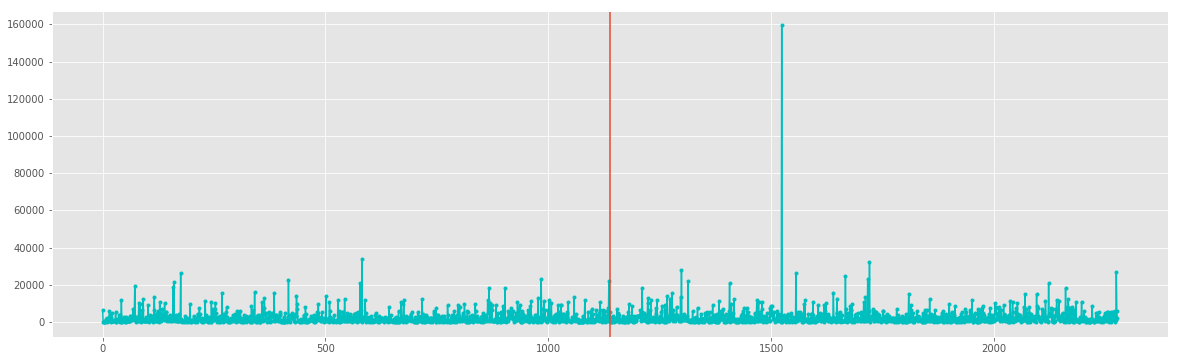

p =  7.474997588794402e-08
Change is statistically significant at significance level of 1%.


In [28]:
## Hint - if abs(upper value of power) is more than what you get here, then change is more significant above.
StatisticalTesting_FirstContact(FullDataframe, 'tweetcount')

length of count_for_plotting =  2278


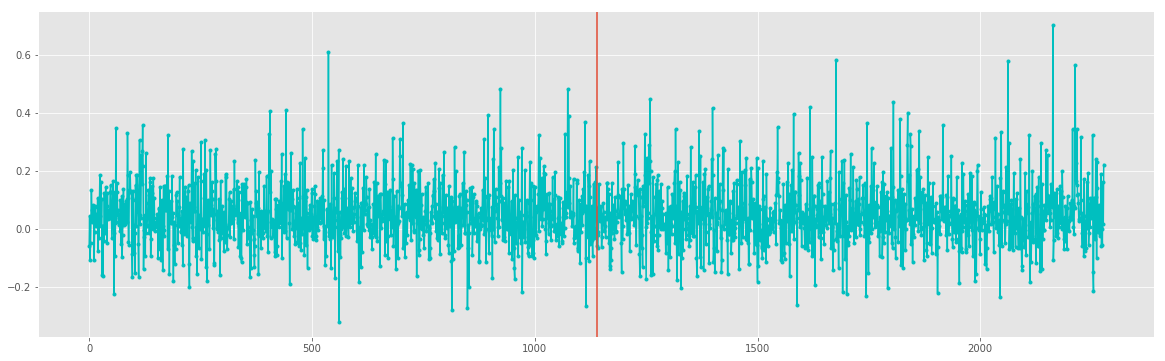

p =  0.5582937798717837
Change is NOT statistically significant even at significance level of 5%.


In [29]:
StatisticalTesting_FirstContact(FullDataframe, 'sentiment')

length of count_for_plotting =  2278


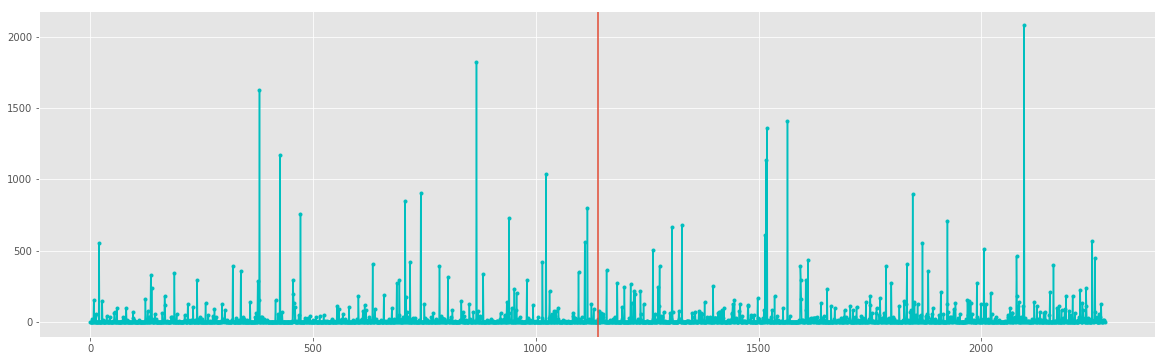

p =  5.35209220019171e-16
Change is statistically significant at significance level of 1%.


In [30]:
StatisticalTesting_FirstContact(FullDataframe, 'trumpcount')

length of count_for_plotting =  2278


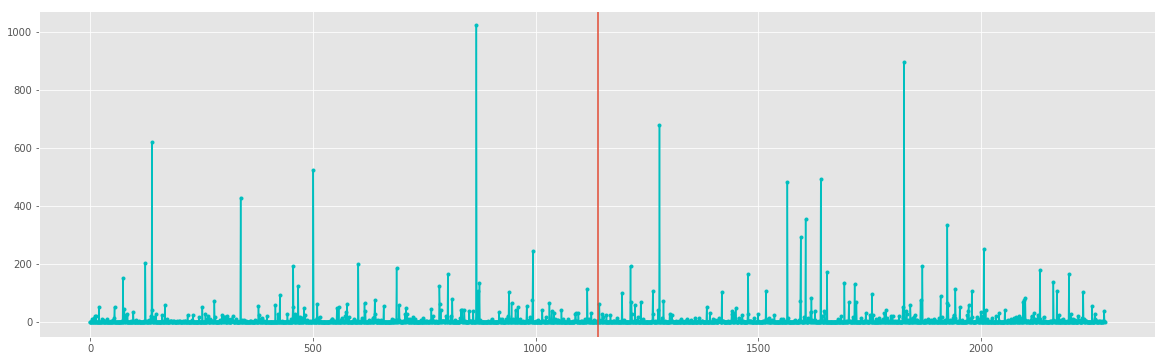

p =  0.0051730171122503915
Change is statistically significant at significance level of 1%.


In [31]:
StatisticalTesting_FirstContact(FullDataframe, 'clintoncount')

length of count_for_plotting =  2278


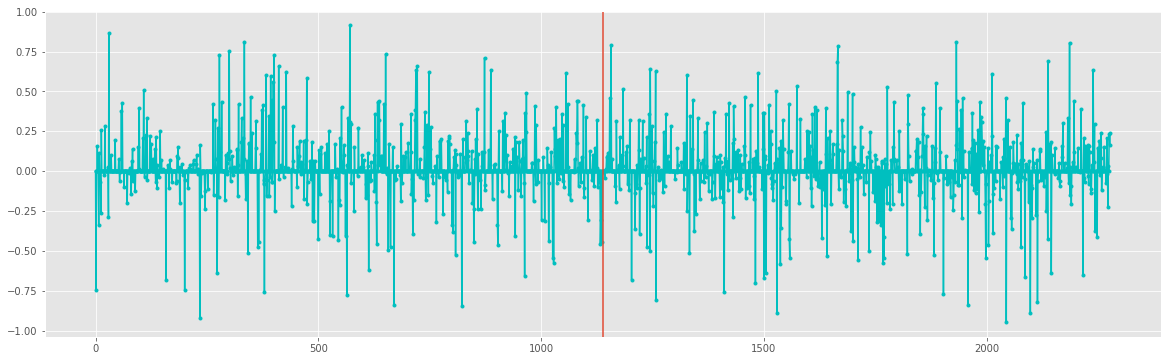

p =  0.16273610556079932
Change is NOT statistically significant even at significance level of 5%.


In [32]:
StatisticalTesting_FirstContact(FullDataframe, 'trump_sent')

length of count_for_plotting =  2278


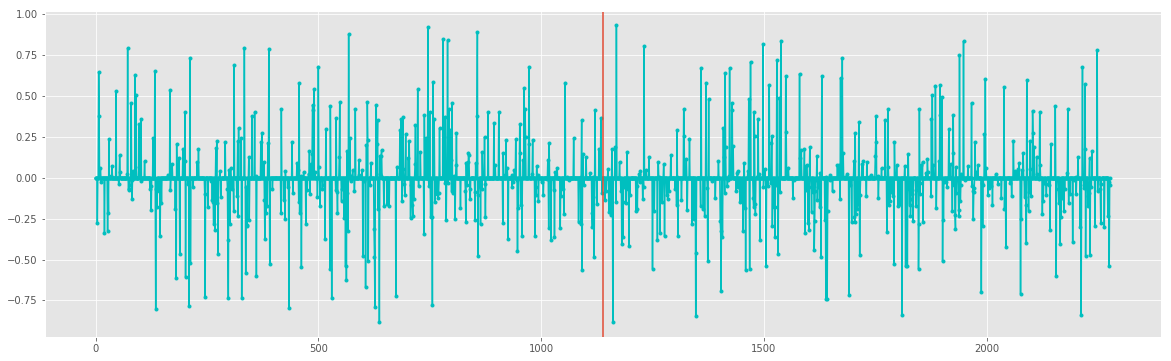

p =  0.03408831050230166
Change is statistically significant at significance level of 5%.


In [33]:
StatisticalTesting_FirstContact(FullDataframe, 'clinton_sent')

### We won't focus on second point and third point of contact for now.

In [15]:
### Since we deleted some rows from FullDataFrame in the beginning, we need to reindex before trying to delete
### again.
# FullDataframe = FullDataframe.reset_index(drop=True)

## Now the influencer users

In [34]:
FullDataframe = import_Users_AllData('6_months_cutoff/inf_responsive_05_18_20_6month.csv')
FullDataframe = remove_users(FullDataframe, '6_months_cutoff/users_to_remove_6month_INF_RESPONSIVE_05_18_2020.csv')
### Since we deleted some rows from FullDataFrame in the beginning, we need to reindex before trying to delete
### again.
FullDataframe = FullDataframe.reset_index(drop=True)


shape =  (548, 50)
column names =  ['Unnamed: 0', 'username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3', 'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3', 'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3', 'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3', 'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3', 'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3', 'before_sentiment1', 'before_sentiment2', 'before_sentiment3', 'after_sentiment1', 'after_sentiment2', 'after_sentiment3', 'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3', 'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3', 'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3', 'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3', 'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3', 'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3',

length of count_for_plotting =  910


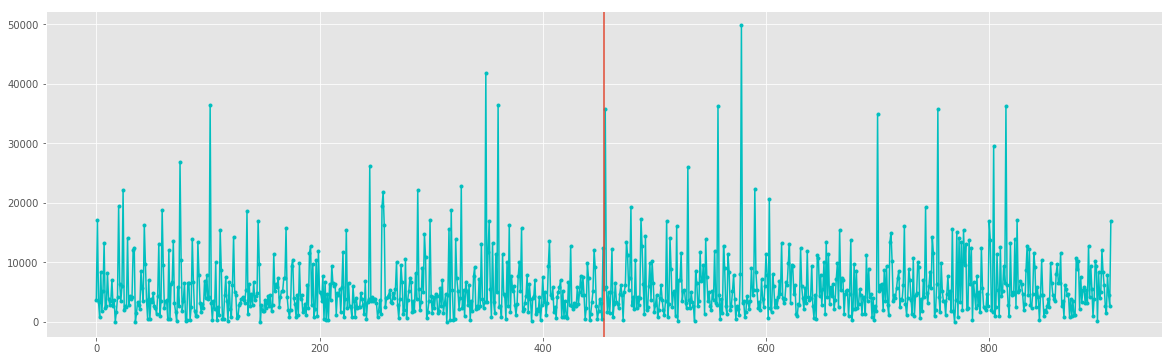

p =  1.865998707739224e-06
Change is statistically significant at significance level of 1%.


In [35]:
StatisticalTesting_FirstContact(FullDataframe, 'tweetcount')

length of count_for_plotting =  910


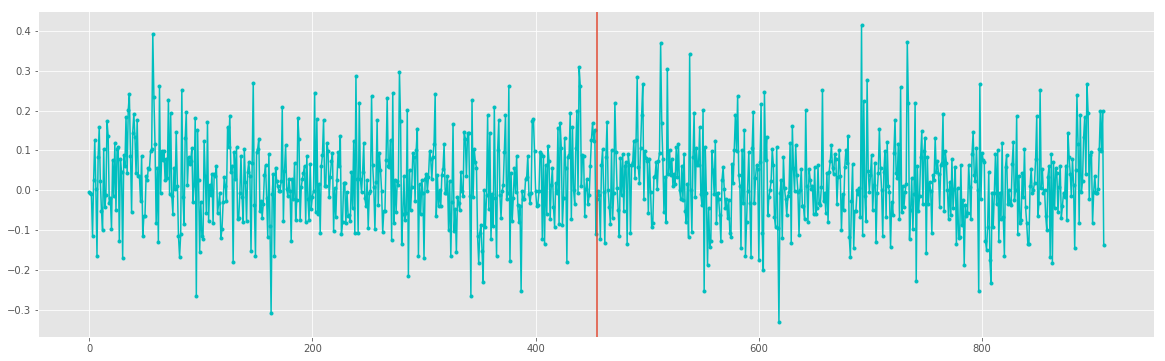

p =  0.0036982355681091533
Change is statistically significant at significance level of 1%.


In [36]:
StatisticalTesting_FirstContact(FullDataframe, 'sentiment')

length of count_for_plotting =  910


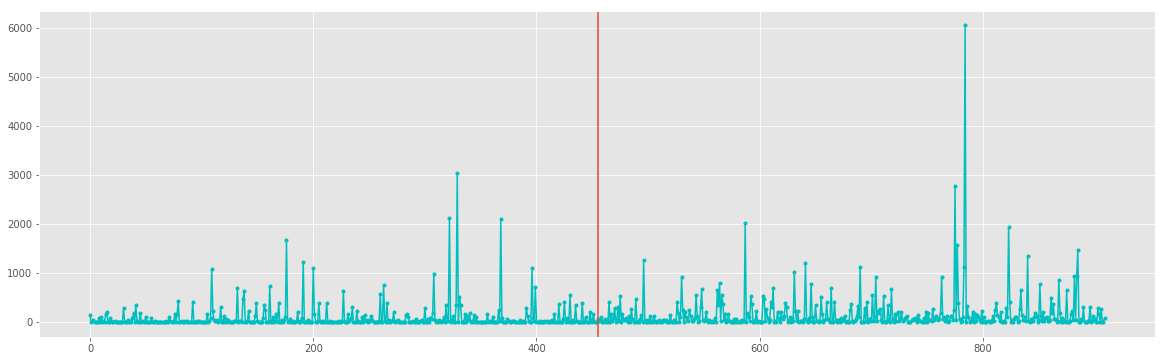

p =  1.6420541369985844e-25
Change is statistically significant at significance level of 1%.


In [37]:
StatisticalTesting_FirstContact(FullDataframe, 'trumpcount')

length of count_for_plotting =  910


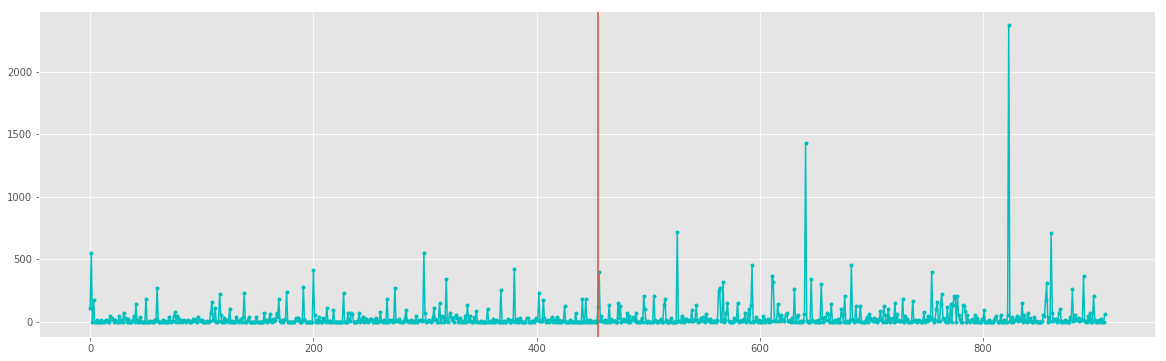

p =  6.696952522710008e-15
Change is statistically significant at significance level of 1%.


In [38]:
StatisticalTesting_FirstContact(FullDataframe, 'clintoncount')

length of count_for_plotting =  910


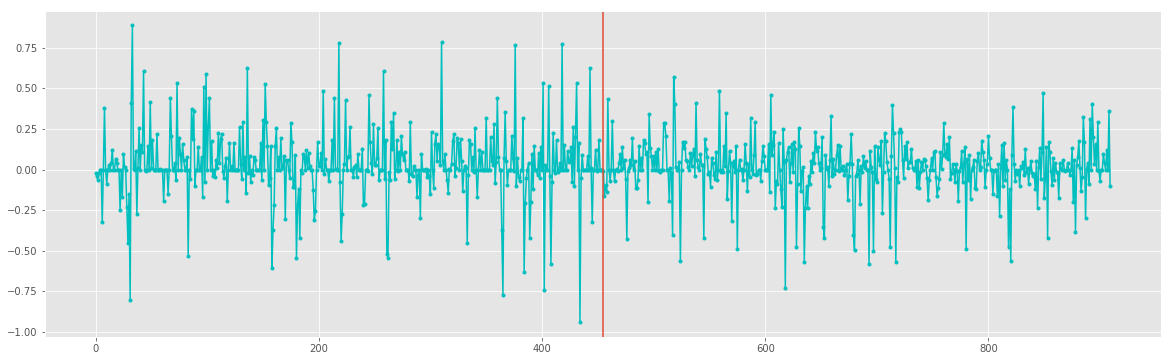

p =  0.17631657001699896
Change is NOT statistically significant even at significance level of 5%.


In [39]:
StatisticalTesting_FirstContact(FullDataframe, 'trump_sent')

length of count_for_plotting =  910


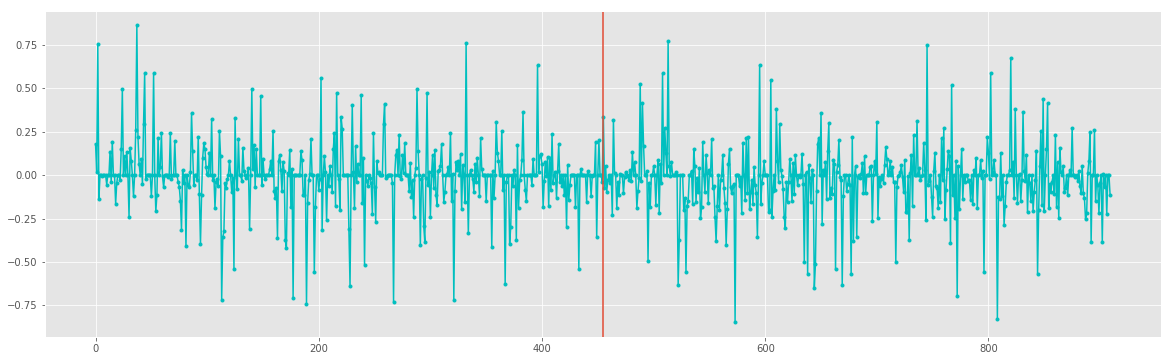

p =  0.011029629458355256
Change is statistically significant at significance level of 5%.


In [40]:
StatisticalTesting_FirstContact(FullDataframe, 'clinton_sent')

### Now non responsive influencer users

In [41]:
FullDataframe = import_Users_AllData('6_months_cutoff/inf_nonresponsive_05_18_20_6month.csv')
FullDataframe = remove_users(FullDataframe, '6_months_cutoff/users_to_remove_6month_INF_NONRESPONSIVE_05_18_2020.csv')
### Since we deleted some rows from FullDataFrame in the beginning, we need to reindex before trying to delete
### again.
FullDataframe = FullDataframe.reset_index(drop=True)


shape =  (3082, 50)
column names =  ['Unnamed: 0', 'username', 'before_tweetcount1', 'before_tweetcount2', 'before_tweetcount3', 'after_tweetcount1', 'after_tweetcount2', 'after_tweetcount3', 'before_trumpcount1', 'before_trumpcount2', 'before_trumpcount3', 'after_trumpcount1', 'after_trumpcount2', 'after_trumpcount3', 'before_clintoncount1', 'before_clintoncount2', 'before_clintoncount3', 'after_clintoncount1', 'after_clintoncount2', 'after_clintoncount3', 'before_sentiment1', 'before_sentiment2', 'before_sentiment3', 'after_sentiment1', 'after_sentiment2', 'after_sentiment3', 'before_trump_sent1', 'before_trump_sent2', 'before_trump_sent3', 'after_trump_sent1', 'after_trump_sent2', 'after_trump_sent3', 'before_clinton_sent1', 'before_clinton_sent2', 'before_clinton_sent3', 'after_clinton_sent1', 'after_clinton_sent2', 'after_clinton_sent3', 'before_positive_sent1', 'before_positive_sent2', 'before_positive_sent3', 'after_positive_sent1', 'after_positive_sent2', 'after_positive_sent3'

length of count_for_plotting =  5336


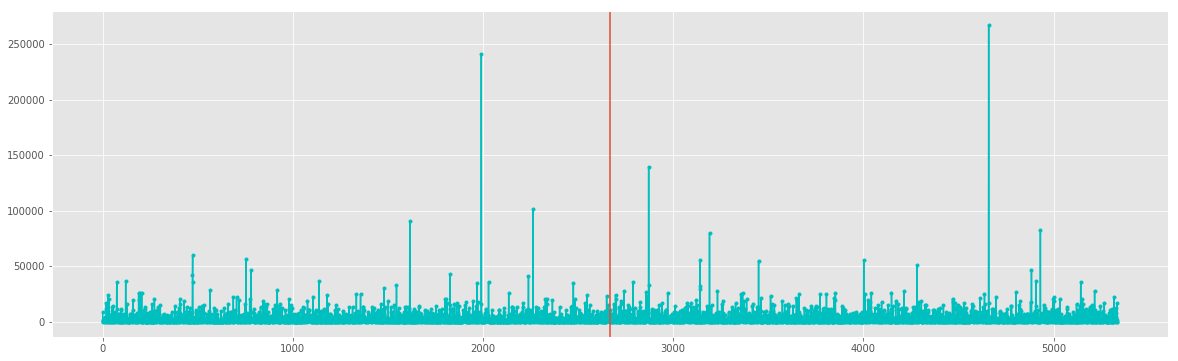

p =  1.3247720630636974e-15
Change is statistically significant at significance level of 1%.


In [42]:
StatisticalTesting_FirstContact(FullDataframe, 'tweetcount')

length of count_for_plotting =  5336


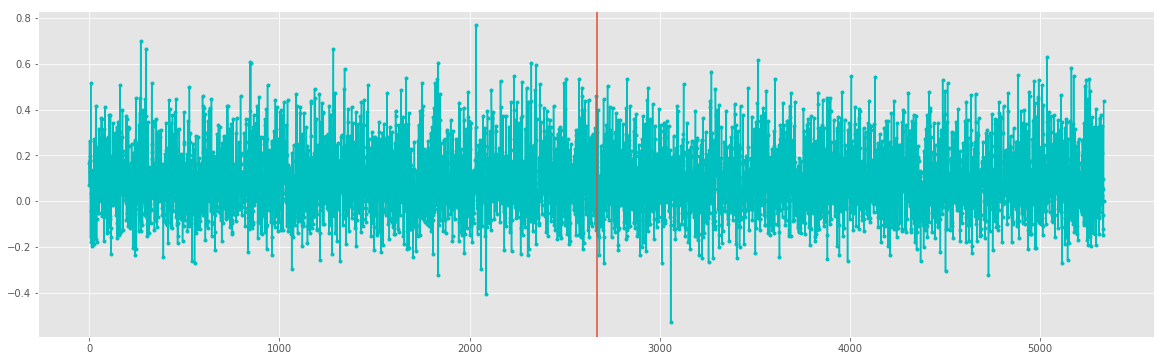

p =  0.005177122273632684
Change is statistically significant at significance level of 1%.


In [43]:
StatisticalTesting_FirstContact(FullDataframe, 'sentiment')

length of count_for_plotting =  5336


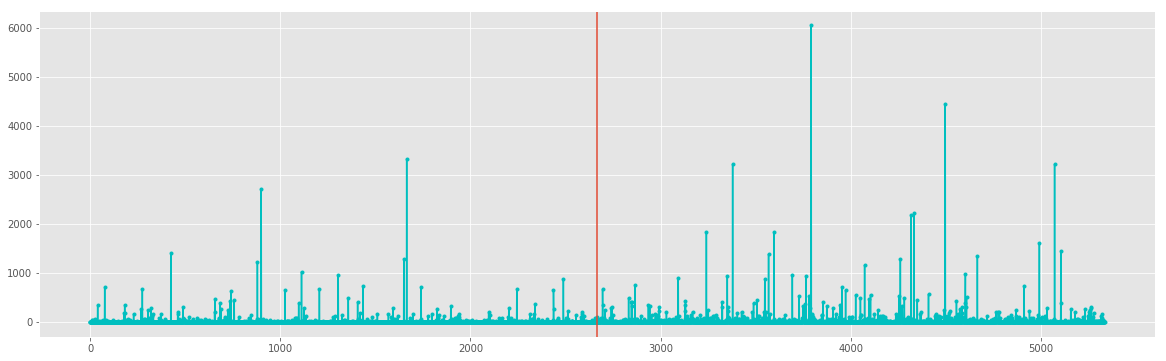

p =  1.9710085464716532e-89
Change is statistically significant at significance level of 1%.


In [44]:
StatisticalTesting_FirstContact(FullDataframe, 'trumpcount')

length of count_for_plotting =  5336


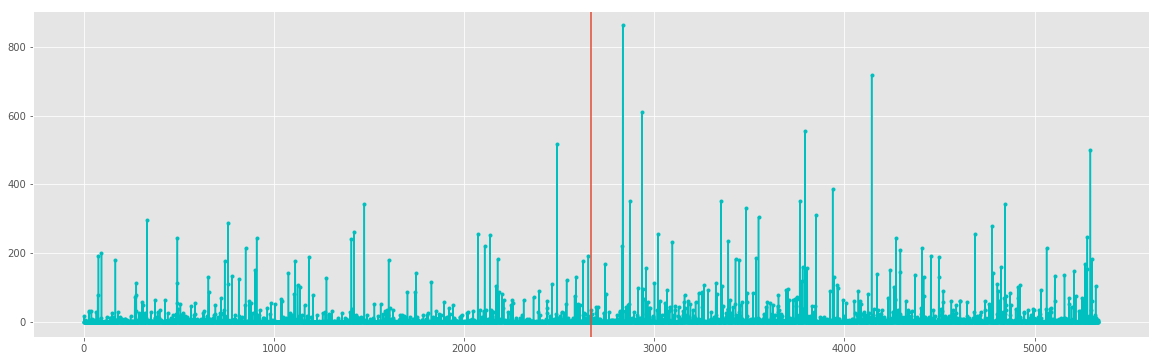

p =  2.0633700226175262e-35
Change is statistically significant at significance level of 1%.


In [45]:
StatisticalTesting_FirstContact(FullDataframe, 'clintoncount')

length of count_for_plotting =  5336


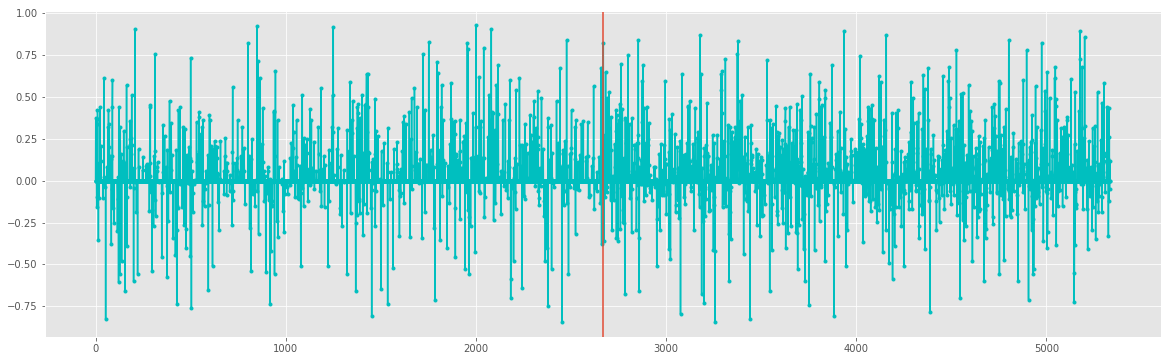

p =  0.001349110728453085
Change is statistically significant at significance level of 1%.


In [46]:
StatisticalTesting_FirstContact(FullDataframe, 'trump_sent')

length of count_for_plotting =  5336


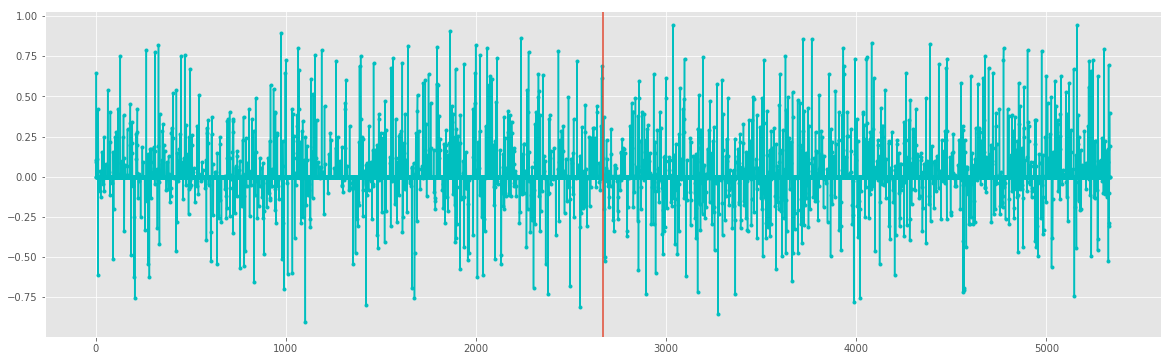

p =  0.32144236177162655
Change is NOT statistically significant even at significance level of 5%.


In [47]:
StatisticalTesting_FirstContact(FullDataframe, 'clinton_sent')